In [10]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [22]:
df = pd.read_csv("train.csv")
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [ ]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df = pd.read_csv("train.csv")


In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
#Handel Missing

In [ ]:

df['Gender'].mode()[0]

'Male'

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

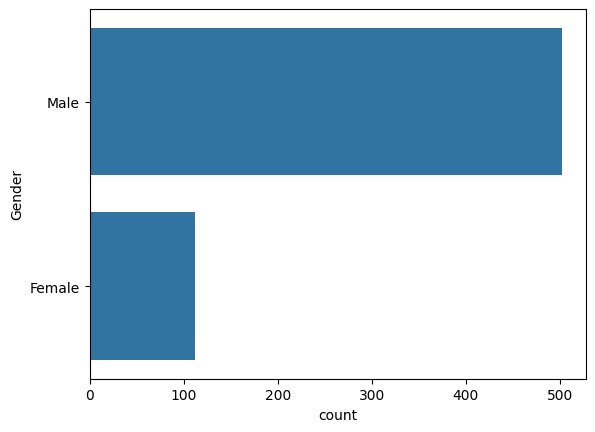

In [ ]:

import seaborn as sns
sns.countplot(df['Gender'])

In [ ]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [ ]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Separate features and target variable
X = df.drop("Loan_Status", axis=1)  # Features
y = df["Loan_Status"]  # Target variable

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after oversampling
print(resampled_df["Loan_Status"].value_counts())


Loan_Status
Y    422
N    422
Name: count, dtype: int64


In [ ]:
d1 = pd.get_dummies(resampled_df['Gender'], drop_first= True)
d2 = pd.get_dummies(resampled_df['Married'], drop_first= True)
d3 = pd.get_dummies(resampled_df['Dependents'], drop_first= True)
d4 = pd.get_dummies(resampled_df['Education'], drop_first= True)
d5 = pd.get_dummies(resampled_df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(resampled_df['Property_Area'], drop_first= True)



resampled_df = pd.concat([resampled_df, d1, d2, d3, d4, d5, d6], axis = 1)




In [ ]:
cols = ['Loan_ID','Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area','ApplicantIncome','CoapplicantIncome']
df_final = resampled_df.drop(columns=cols, axis=1)

In [ ]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

In [ ]:
test = pd.read_csv("test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']




t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)





In [ ]:
df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

In [ ]:
cols = ['Loan_ID','Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area','ApplicantIncome','CoapplicantIncome']
test = test.drop(columns=cols, axis=1)


In [ ]:
x = df_final.drop(columns=['Loan_Status'], axis=1)
y = df_final['Loan_Status']

In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()
log_reg_clf = LogisticRegression(max_iter=10)
svc_clf = SVC()

# List of tuples for VotingClassifier: ('name', classifier)
estimators = [
    ('decision_tree', dt_clf),
    ('logistic_regression', log_reg_clf),
    ('svc', svc_clf)
]

# Hard voting classifier
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Train VotingClassifier
voting_clf.fit(x_train, y_train)

# Save the trained model to a file
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(voting_clf, file)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Load the saved model from file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use loaded_model to make predictions 
y_pred = loaded_model.predict(x_test)

# Example of using the loaded model
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.56


In [ ]:
from sklearn.metrics import classification_report
acc = classification_report(y_test, y_pred)
acc

'              precision    recall  f1-score   support\n\n           N       0.84      0.23      0.36       114\n           Y       0.51      0.95      0.66        97\n\n    accuracy                           0.56       211\n   macro avg       0.67      0.59      0.51       211\nweighted avg       0.69      0.56      0.50       211\n'

In [ ]:
log_reg_clf.fit(x_train, y_train)
filename2 = 'model2.pkl'
with open(filename2, 'wb') as file:
    pickle.dump(log_reg_clf, file)

with open(filename2, 'rb') as file:
    loaded_model2 = pickle.load(file)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
svc_clf.fit(x_train, y_train)
filename3 = 'model3.pkl'
with open(filename3, 'wb') as file:
    pickle.dump(svc_clf, file)

with open(filename3, 'rb') as file:
    loaded_model3 = pickle.load(file)


In [ ]:
dt_clf.fit(x_train, y_train)
filename4 = 'model4.pkl'
with open(filename4, 'wb') as file:
    pickle.dump(dt_clf, file)

with open(filename4, 'rb') as file:
    loaded_model4 = pickle.load(file)
